In [297]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [298]:
data=pd.read_csv('./creditcard.csv.zip')

In [299]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [300]:
data.shape

(284807, 31)

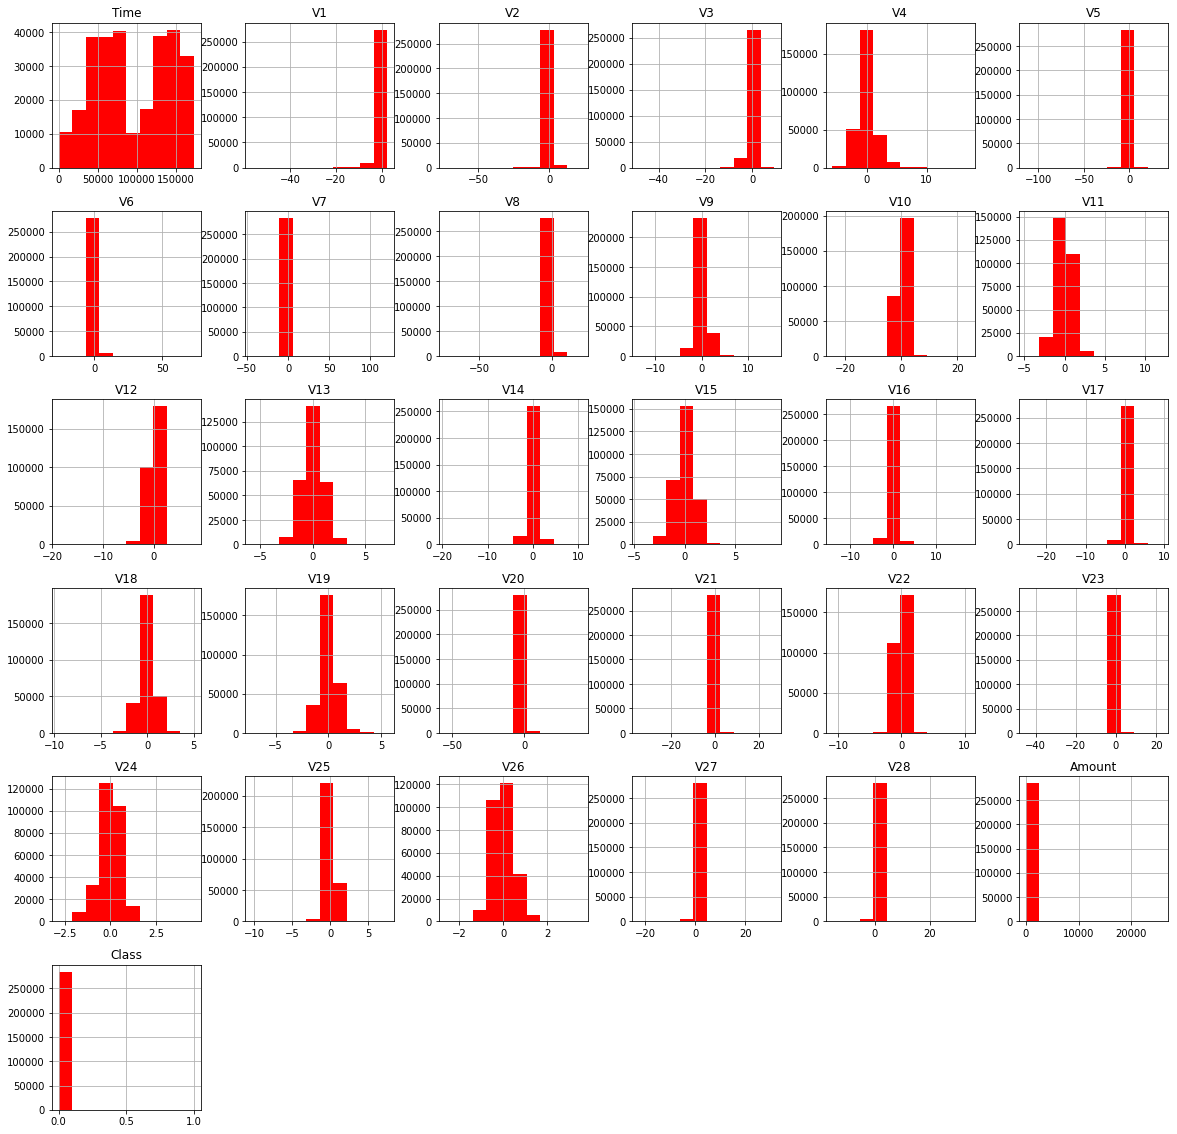

In [301]:
data.hist(figsize=(20,20),color='red')
plt.show()

Correlation

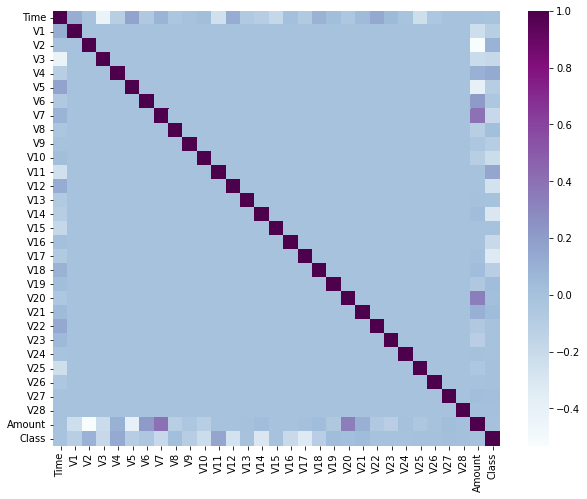

In [302]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

In [303]:
#we will check if there are any null values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [305]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

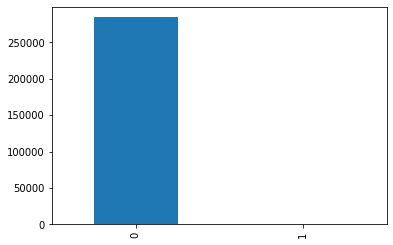

In [306]:
#visual representation of instances per class
data.Class.value_counts().plot.bar()

In [307]:
fraud=data[data['Class']==1]
non_fraud=data[data['Class']==0]

In [308]:
fraud.shape,non_fraud.shape

((492, 31), (284315, 31))

dataset is highly imbalance. So we need to balance it

In [309]:
non_fraud=non_fraud.sample(fraud.shape[0],random_state=42)          #randomly selecting

In [310]:
non_fraud.shape

(492, 31)

Now he have balanced data. We will merge fraud and non_fraud data

In [311]:
dataset=fraud.append(non_fraud,ignore_index='true')

In [312]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
979,76376.0,-1.525978,0.796226,1.172478,-0.947111,0.077071,-1.655590,0.670737,0.051626,-0.887067,...,0.057467,-0.072446,-0.397195,0.825601,0.404932,0.923867,-0.262266,-0.133368,23.00,0
980,60348.0,-0.705795,1.418016,0.993756,0.908646,-0.171163,-0.566892,0.367416,0.421875,-0.736533,...,0.197948,0.655792,-0.048655,0.415045,-0.287710,-0.305466,0.311077,0.161942,2.80,0
981,47151.0,0.995185,-0.147746,-0.108914,1.168451,0.329676,1.182090,-0.316034,0.323043,0.541030,...,-0.050798,0.005680,-0.370879,-1.385989,0.746056,-0.191335,0.070408,0.041460,98.90,0
982,53857.0,-1.197741,3.166857,-3.476764,0.818768,1.310580,-0.445066,0.384113,0.497864,0.552898,...,-0.293749,-0.264981,0.090417,-1.691177,0.032926,-0.285576,0.752378,0.345595,0.89,0
983,65405.0,-0.558983,-0.431438,1.893696,-1.783053,-1.752650,0.522665,1.156169,-0.430282,1.762763,...,0.119397,0.968116,-0.352839,0.049816,0.329348,-0.412496,-0.153488,-0.443773,281.34,0


In [313]:
dataset.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

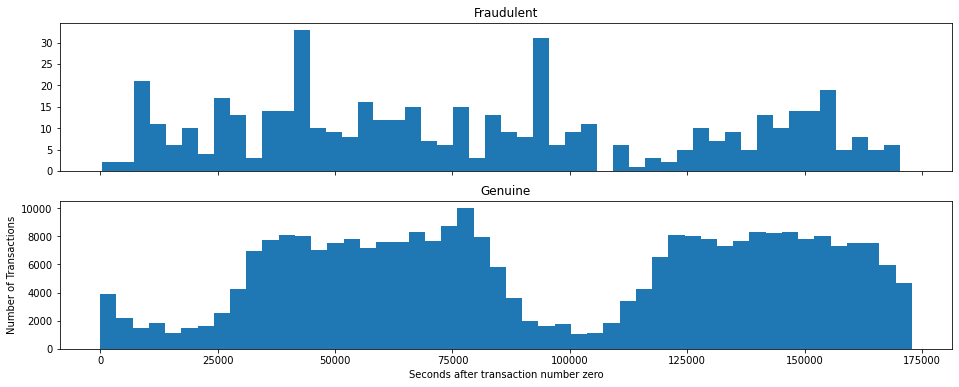

In [314]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.hist(data["Time"][data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(data["Time"][data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

The transactions occur in a cyclic way. But the time feature does not provide any useful information as the time when the first transaction was initiated is not given. Thus, we'll drop this feature

Now dividing our dateset into independent and dependent variable

In [315]:
X=dataset.drop('Class',axis=1)
#time column is non of any use
X=dataset.drop('Time',axis=1)      
Y=dataset['Class']
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


splitting into train and test

In [316]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.2)

scaling our dataset

In [317]:
#define scaler
scaler=StandardScaler()
#transform data
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
#during tranformation also dataframe is converted to numpy

In [318]:
#tranformation in y_train and y_test
Y_train=y_train.to_numpy()
Y_test=y_test.to_numpy()

In [319]:
x_test_scaled[1:2,:]

array([[ 0.01677702, -0.62840106,  0.16032794, -0.02413105, -0.62687557,
         0.63688091,  0.50100432,  0.09861071,  0.08156878, -0.48148377,
         0.57449708,  0.20417519,  0.63054242, -0.36624526, -0.09586445,
        -0.5264332 , -0.07786693,  0.23441644,  1.88079111,  2.00180573,
         0.26112452,  0.56355214,  1.39911645,  0.69753413,  0.73094764,
        -0.43135719,  0.17641661,  0.50021643,  3.17602819,  0.99114467]])

In [320]:
#svc model
model_svc=SVC(kernel = 'linear',gamma ='scale')
model_svc.fit(x_train_scaled,Y_train)
accuracy=model_svc.score(x_test_scaled,Y_test)
print(accuracy)

1.0


In [321]:
#logistic model
model_lr=LogisticRegression()
model_lr.fit(x_train_scaled,Y_train)
accuracy_lr=model_lr.score(x_test_scaled,Y_test)
print(accuracy_lr)  

1.0


In [322]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_scaled,Y_train)
accuracy_knn=model_knn.score(x_test_scaled,Y_test)
print(accuracy_knn)

0.9898477157360406


In [323]:
#xgboost model
import xgboost as xgb
model_xg = xgb.XGBRegressor()
model_xg.fit(x_train_scaled,Y_train)
accuracy_xg=model_xg.score(x_test_scaled,Y_test)
print(accuracy_xg)

[05:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9999999950150777


In [324]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier(max_depth=3)
model_dt.fit(x_train_scaled,Y_train)
accuracy_dt=model_dt.score(x_test_scaled,Y_test)
print(accuracy_dt)

1.0


In [325]:
#adaboost model
from sklearn.ensemble import AdaBoostClassifier
model_ad= AdaBoostClassifier(n_estimators=65,random_state=42)
model_ad.fit(x_train_scaled,Y_train)
accuracy_ad=model_ad.score(x_test_scaled,Y_test)
print(accuracy_ad)

1.0


In [326]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(n_estimators=100,max_depth=100, random_state=42)
model_rf.fit(x_train_scaled,Y_train)
accuracy_rf=model_rf.score(x_test_scaled,Y_test)
print(accuracy_rf)

1.0


In [333]:
#isolate forest model
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
model_ir=IsolationForest(random_state=None)
model_ir.fit(x_train_scaled,Y_train)
y_pred=model_ir.predict(x_test_scaled)

#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
accuracy_ir=accuracy_score(Y_test,y_pred)
print(accuracy_ir)

0.6142131979695431


In [331]:
Y_test

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1])